## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9812085	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9606659	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9390168	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9218568	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9043444	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8893124	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8743665	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8575042	total: 65.5ms	remaining: 8.12s
8:	learn: 0.8422951	total: 66.3ms	remaining: 7.3s
9:	learn: 0.8261771	total: 67.1ms	remaining: 6.64s
10:	learn: 0.8111030	total: 67.9ms	remaining: 6.11s
11:	learn: 0.7954465	total: 68.7ms	remaining: 5.66s
12:	learn: 0.7802319	total: 69.5ms	remaining: 5.28s
13:	learn: 0.7652987	total: 70.3ms	remaining: 4.95s
14:	learn: 0.7517104	total: 71.1ms	remaining: 4.67s
15:	learn: 0.7381475	total: 71.9ms	remaining: 4.42s
16:	learn: 0.7241367	total: 72.7ms	remaining: 4.2s
17:	learn: 0.7120305	total: 73.5ms	remaining: 4.01s
18:	learn: 0.6994443	total: 74.2ms	remaining: 

62:	learn: 0.3983734	total: 110ms	remaining: 1.63s
63:	learn: 0.3947923	total: 111ms	remaining: 1.62s
64:	learn: 0.3915492	total: 112ms	remaining: 1.6s
65:	learn: 0.3881866	total: 112ms	remaining: 1.59s
66:	learn: 0.3843137	total: 113ms	remaining: 1.58s
67:	learn: 0.3811083	total: 114ms	remaining: 1.56s
68:	learn: 0.3780214	total: 115ms	remaining: 1.55s
69:	learn: 0.3746354	total: 116ms	remaining: 1.54s
70:	learn: 0.3710754	total: 116ms	remaining: 1.52s
71:	learn: 0.3685756	total: 117ms	remaining: 1.51s
72:	learn: 0.3657714	total: 118ms	remaining: 1.5s
73:	learn: 0.3626442	total: 119ms	remaining: 1.49s
74:	learn: 0.3604096	total: 120ms	remaining: 1.48s
75:	learn: 0.3576876	total: 121ms	remaining: 1.47s
76:	learn: 0.3552360	total: 121ms	remaining: 1.46s
77:	learn: 0.3521280	total: 122ms	remaining: 1.44s
78:	learn: 0.3490879	total: 123ms	remaining: 1.43s
79:	learn: 0.3468233	total: 124ms	remaining: 1.43s
80:	learn: 0.3440297	total: 125ms	remaining: 1.42s
81:	learn: 0.3416577	total: 126ms

162:	learn: 0.2393413	total: 192ms	remaining: 987ms
163:	learn: 0.2385129	total: 193ms	remaining: 984ms
164:	learn: 0.2375987	total: 194ms	remaining: 981ms
165:	learn: 0.2368619	total: 195ms	remaining: 978ms
166:	learn: 0.2362972	total: 195ms	remaining: 975ms
167:	learn: 0.2353264	total: 196ms	remaining: 972ms
168:	learn: 0.2346722	total: 197ms	remaining: 969ms
169:	learn: 0.2339551	total: 198ms	remaining: 965ms
170:	learn: 0.2333113	total: 199ms	remaining: 962ms
171:	learn: 0.2324889	total: 199ms	remaining: 960ms
172:	learn: 0.2318326	total: 200ms	remaining: 957ms
173:	learn: 0.2311598	total: 201ms	remaining: 954ms
174:	learn: 0.2305552	total: 202ms	remaining: 952ms
175:	learn: 0.2301192	total: 203ms	remaining: 950ms
176:	learn: 0.2293299	total: 204ms	remaining: 946ms
177:	learn: 0.2289065	total: 204ms	remaining: 944ms
178:	learn: 0.2286251	total: 205ms	remaining: 941ms
179:	learn: 0.2280018	total: 206ms	remaining: 938ms
180:	learn: 0.2271545	total: 207ms	remaining: 936ms
181:	learn: 

292:	learn: 0.1697905	total: 300ms	remaining: 724ms
293:	learn: 0.1695167	total: 301ms	remaining: 723ms
294:	learn: 0.1689625	total: 302ms	remaining: 722ms
295:	learn: 0.1685715	total: 303ms	remaining: 721ms
296:	learn: 0.1682241	total: 304ms	remaining: 719ms
297:	learn: 0.1679670	total: 305ms	remaining: 718ms
298:	learn: 0.1677102	total: 306ms	remaining: 716ms
299:	learn: 0.1672840	total: 307ms	remaining: 715ms
300:	learn: 0.1669138	total: 307ms	remaining: 714ms
301:	learn: 0.1665397	total: 308ms	remaining: 712ms
302:	learn: 0.1662541	total: 309ms	remaining: 711ms
303:	learn: 0.1658097	total: 310ms	remaining: 709ms
304:	learn: 0.1653529	total: 311ms	remaining: 708ms
305:	learn: 0.1648719	total: 312ms	remaining: 706ms
306:	learn: 0.1644637	total: 312ms	remaining: 705ms
307:	learn: 0.1640425	total: 313ms	remaining: 704ms
308:	learn: 0.1638209	total: 314ms	remaining: 702ms
309:	learn: 0.1633358	total: 315ms	remaining: 701ms
310:	learn: 0.1629332	total: 316ms	remaining: 699ms
311:	learn: 

387:	learn: 0.1397220	total: 383ms	remaining: 604ms
388:	learn: 0.1396986	total: 384ms	remaining: 603ms
389:	learn: 0.1395608	total: 384ms	remaining: 601ms
390:	learn: 0.1393303	total: 385ms	remaining: 600ms
391:	learn: 0.1392369	total: 386ms	remaining: 599ms
392:	learn: 0.1389703	total: 387ms	remaining: 598ms
393:	learn: 0.1385631	total: 388ms	remaining: 597ms
394:	learn: 0.1381039	total: 389ms	remaining: 595ms
395:	learn: 0.1378041	total: 390ms	remaining: 594ms
396:	learn: 0.1376736	total: 390ms	remaining: 593ms
397:	learn: 0.1373167	total: 391ms	remaining: 592ms
398:	learn: 0.1369223	total: 392ms	remaining: 590ms
399:	learn: 0.1368728	total: 393ms	remaining: 589ms
400:	learn: 0.1366771	total: 394ms	remaining: 588ms
401:	learn: 0.1365803	total: 394ms	remaining: 587ms
402:	learn: 0.1363861	total: 395ms	remaining: 585ms
403:	learn: 0.1361673	total: 396ms	remaining: 584ms
404:	learn: 0.1357644	total: 397ms	remaining: 583ms
405:	learn: 0.1355521	total: 398ms	remaining: 582ms
406:	learn: 

511:	learn: 0.1130884	total: 491ms	remaining: 468ms
512:	learn: 0.1128434	total: 492ms	remaining: 467ms
513:	learn: 0.1126226	total: 494ms	remaining: 467ms
514:	learn: 0.1123897	total: 495ms	remaining: 466ms
515:	learn: 0.1120948	total: 495ms	remaining: 465ms
516:	learn: 0.1118911	total: 496ms	remaining: 464ms
517:	learn: 0.1116858	total: 498ms	remaining: 463ms
518:	learn: 0.1114927	total: 499ms	remaining: 462ms
519:	learn: 0.1112636	total: 500ms	remaining: 462ms
520:	learn: 0.1110218	total: 501ms	remaining: 461ms
521:	learn: 0.1108309	total: 502ms	remaining: 460ms
522:	learn: 0.1106706	total: 503ms	remaining: 459ms
523:	learn: 0.1104486	total: 504ms	remaining: 458ms
524:	learn: 0.1103420	total: 505ms	remaining: 457ms
525:	learn: 0.1101592	total: 506ms	remaining: 456ms
526:	learn: 0.1099611	total: 507ms	remaining: 455ms
527:	learn: 0.1096915	total: 508ms	remaining: 454ms
528:	learn: 0.1094201	total: 510ms	remaining: 454ms
529:	learn: 0.1091730	total: 511ms	remaining: 453ms
530:	learn: 

582:	learn: 0.1000001	total: 556ms	remaining: 398ms
583:	learn: 0.0998074	total: 557ms	remaining: 397ms
584:	learn: 0.0996337	total: 558ms	remaining: 396ms
585:	learn: 0.0994612	total: 559ms	remaining: 395ms
586:	learn: 0.0993168	total: 560ms	remaining: 394ms
587:	learn: 0.0991950	total: 561ms	remaining: 393ms
588:	learn: 0.0990333	total: 562ms	remaining: 392ms
589:	learn: 0.0988631	total: 563ms	remaining: 391ms
590:	learn: 0.0987312	total: 564ms	remaining: 390ms
591:	learn: 0.0985835	total: 564ms	remaining: 389ms
592:	learn: 0.0984715	total: 565ms	remaining: 388ms
593:	learn: 0.0982768	total: 567ms	remaining: 387ms
594:	learn: 0.0980587	total: 567ms	remaining: 386ms
595:	learn: 0.0980111	total: 568ms	remaining: 385ms
596:	learn: 0.0978183	total: 569ms	remaining: 384ms
597:	learn: 0.0976553	total: 570ms	remaining: 383ms
598:	learn: 0.0975170	total: 571ms	remaining: 382ms
599:	learn: 0.0973729	total: 572ms	remaining: 381ms
600:	learn: 0.0972080	total: 573ms	remaining: 380ms
601:	learn: 

709:	learn: 0.0831351	total: 664ms	remaining: 271ms
710:	learn: 0.0829870	total: 665ms	remaining: 270ms
711:	learn: 0.0829636	total: 666ms	remaining: 269ms
712:	learn: 0.0828107	total: 666ms	remaining: 268ms
713:	learn: 0.0826407	total: 667ms	remaining: 267ms
714:	learn: 0.0825145	total: 668ms	remaining: 266ms
715:	learn: 0.0824082	total: 669ms	remaining: 265ms
716:	learn: 0.0823149	total: 669ms	remaining: 264ms
717:	learn: 0.0821547	total: 670ms	remaining: 263ms
718:	learn: 0.0820666	total: 671ms	remaining: 262ms
719:	learn: 0.0820412	total: 672ms	remaining: 261ms
720:	learn: 0.0820041	total: 673ms	remaining: 260ms
721:	learn: 0.0819126	total: 673ms	remaining: 259ms
722:	learn: 0.0817906	total: 674ms	remaining: 258ms
723:	learn: 0.0817074	total: 675ms	remaining: 257ms
724:	learn: 0.0816072	total: 676ms	remaining: 256ms
725:	learn: 0.0814086	total: 677ms	remaining: 255ms
726:	learn: 0.0812370	total: 677ms	remaining: 254ms
727:	learn: 0.0811254	total: 678ms	remaining: 253ms
728:	learn: 

811:	learn: 0.0725575	total: 746ms	remaining: 173ms
812:	learn: 0.0724979	total: 747ms	remaining: 172ms
813:	learn: 0.0724680	total: 748ms	remaining: 171ms
814:	learn: 0.0724205	total: 749ms	remaining: 170ms
815:	learn: 0.0723608	total: 749ms	remaining: 169ms
816:	learn: 0.0722540	total: 750ms	remaining: 168ms
817:	learn: 0.0721493	total: 751ms	remaining: 167ms
818:	learn: 0.0721112	total: 752ms	remaining: 166ms
819:	learn: 0.0720956	total: 753ms	remaining: 165ms
820:	learn: 0.0719755	total: 753ms	remaining: 164ms
821:	learn: 0.0719283	total: 754ms	remaining: 163ms
822:	learn: 0.0719012	total: 755ms	remaining: 162ms
823:	learn: 0.0718469	total: 756ms	remaining: 161ms
824:	learn: 0.0717169	total: 757ms	remaining: 161ms
825:	learn: 0.0716428	total: 758ms	remaining: 160ms
826:	learn: 0.0715418	total: 758ms	remaining: 159ms
827:	learn: 0.0714323	total: 759ms	remaining: 158ms
828:	learn: 0.0712683	total: 760ms	remaining: 157ms
829:	learn: 0.0712309	total: 761ms	remaining: 156ms
830:	learn: 

942:	learn: 0.0613375	total: 854ms	remaining: 51.6ms
943:	learn: 0.0612663	total: 855ms	remaining: 50.7ms
944:	learn: 0.0612322	total: 856ms	remaining: 49.8ms
945:	learn: 0.0611540	total: 857ms	remaining: 48.9ms
946:	learn: 0.0610721	total: 858ms	remaining: 48ms
947:	learn: 0.0610134	total: 858ms	remaining: 47.1ms
948:	learn: 0.0609292	total: 859ms	remaining: 46.2ms
949:	learn: 0.0609027	total: 860ms	remaining: 45.3ms
950:	learn: 0.0608786	total: 861ms	remaining: 44.4ms
951:	learn: 0.0608110	total: 862ms	remaining: 43.5ms
952:	learn: 0.0607227	total: 863ms	remaining: 42.5ms
953:	learn: 0.0606163	total: 863ms	remaining: 41.6ms
954:	learn: 0.0605469	total: 864ms	remaining: 40.7ms
955:	learn: 0.0604148	total: 865ms	remaining: 39.8ms
956:	learn: 0.0603282	total: 866ms	remaining: 38.9ms
957:	learn: 0.0602257	total: 867ms	remaining: 38ms
958:	learn: 0.0601219	total: 868ms	remaining: 37.1ms
959:	learn: 0.0600475	total: 868ms	remaining: 36.2ms
960:	learn: 0.0599766	total: 869ms	remaining: 35.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

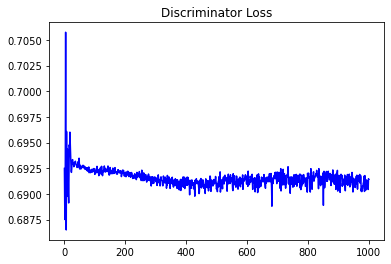

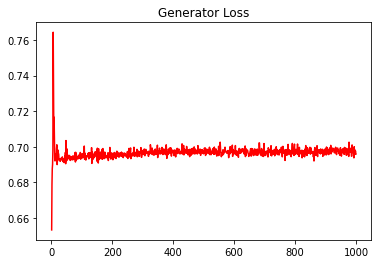

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11857624468829105


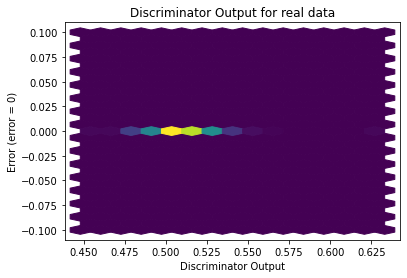

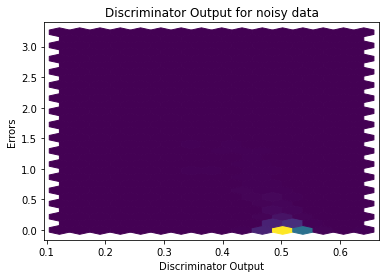

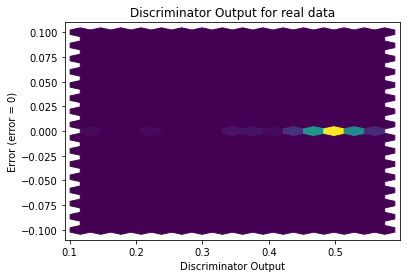

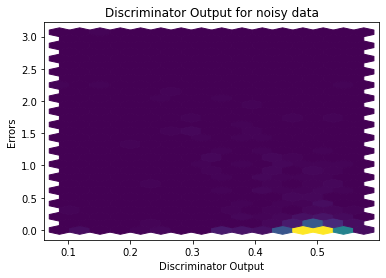

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


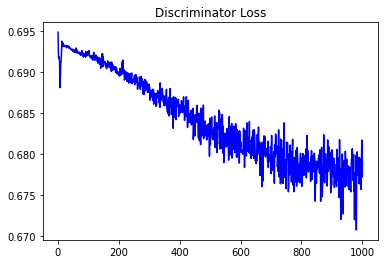

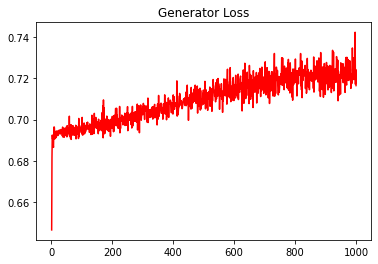

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1308808244041294


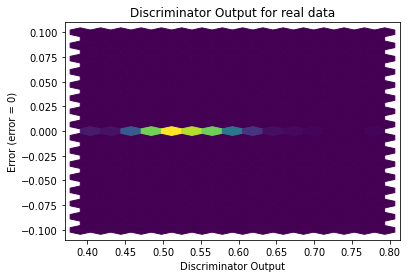

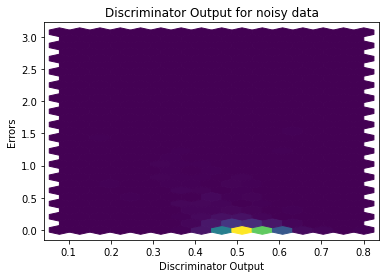

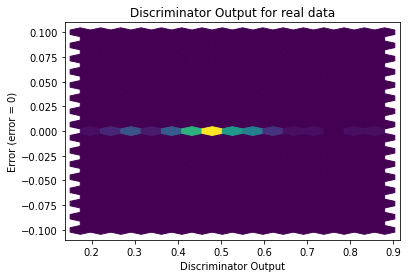

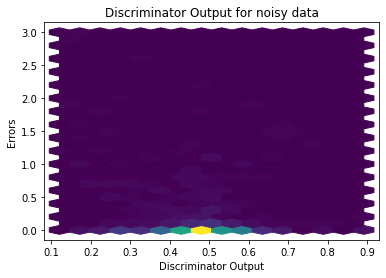

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1965]], requires_grad=True)
